#   Tarea 2 pregunta 1


##  Importación bibliotecas

In [1]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

##  Extracción imágenes

In [2]:
def extraer_imagenes(directorio):
    """
    En esta parte solamente se importaran las imagenes, en la parte de mas abajo se normalizaran,
    con el fin de normalizar los datos ya estando en blanco y negro
    """
    imagenes_train=[]
    imagenes_test=[]

    for tipo_datos in ['train', 'test']:
        ruta_tipo = os.path.join(directorio, tipo_datos)
        for foto in os.listdir(ruta_tipo):
            ruta_foto=os.path.join(ruta_tipo,foto)
            try:
                img = image.load_img(ruta_foto)
                img_array = np.array(img)
                if tipo_datos == 'train':
                        imagenes_train.append(img_array)
                else:
                    imagenes_test.append(img_array)
            except Exception as e:
                print(f"Error al cargar {ruta_foto}: {e}")
    # Convertir a arrays y normalizar
    X_train = imagenes_train
    X_test = imagenes_test
    return X_train, X_test
    

In [3]:
X_train, X_test=extraer_imagenes("dataset_flores")

##  Convertidor de rgb a blanco y negro

In [4]:
def rgb2gray(rgb):
    """Convert from color image (RGB) to grayscale.
       Source: opencv.org
       grayscale = 0.299*red + 0.587*green + 0.114*blue
    Argument:
        rgb (tensor): rgb image
    Return:
        (tensor): grayscale image
    """
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

##  Cambio imágenes de RGB a blanco y negro

In [6]:
x_train_gray = [rgb2gray(imagen) for imagen in X_train]
x_test_gray = [rgb2gray(imagen) for imagen in X_test]


##  Prueba de como se ven imagenes

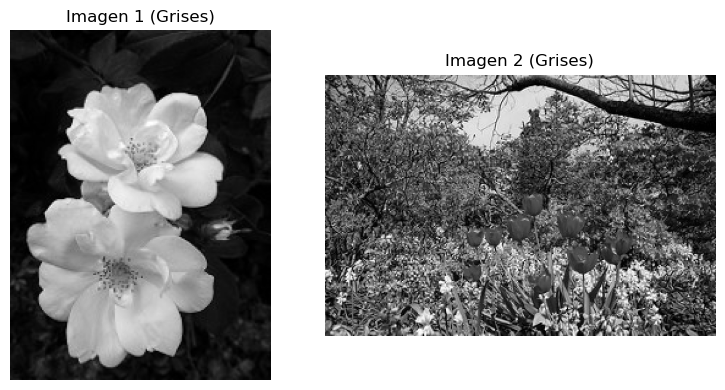

In [7]:
import matplotlib.pyplot as plt

# Mostramos dos imágenes de las que ya convertiste a escala de grises
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Primera imagen
axs[0].imshow(x_train_gray[0], cmap='gray')
axs[0].set_title('Imagen 1 (Grises)')
axs[0].axis('off')

# Segunda imagen
axs[1].imshow(x_train_gray[1], cmap='gray')
axs[1].set_title('Imagen 2 (Grises)')
axs[1].axis('off')

plt.tight_layout()
plt.show()
